<a href="https://colab.research.google.com/github/HasanALI313/Covnets/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import unique, argmax
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt
import matplotlib.pyplot
import numpy as np 


In [ ]:
# loading MNIST dataset 
(x_train, y_train), (x_test, y_test) = load_data()
# reshaping the triaining and testing data 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
                           x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],x_test.shape[2], 1))

In [ ]:
# normalising the values of pixels of images
x_train = x_train.astype('float32')/ 255.0
x_test = x_test.astype('float32')/ 255.0


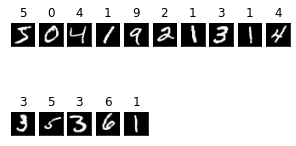

In [ ]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
  ax = fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap= 'gray')
  ax.set_title(y_train[i])

In [ ]:
# determine the shape of the input images
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [ ]:
# defining the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu' , input_shape = img_shape))
model.add(MaxPool2D((2,2)))
model.add((MaxPool2D((2,2))))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 500)               5

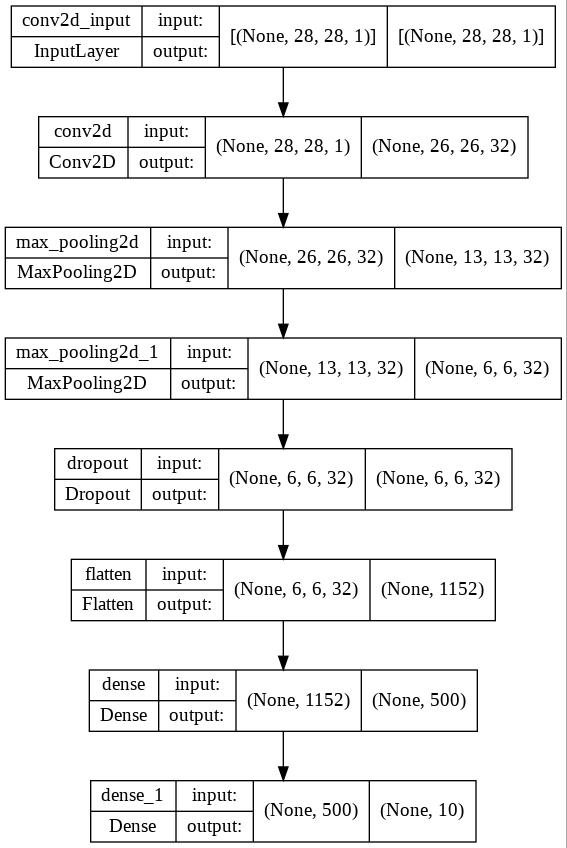

In [ ]:
plot_model(model, 'model.jpg' , show_shapes = True)

In [ ]:
# now we train and test the model
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
x = model.fit(x_train, y_train , epochs= 10 , batch_size = 128 , verbose = 2 , validation_split= 0.1)

Epoch 1/10
422/422 - 20s - loss: 0.3349 - accuracy: 0.8986 - val_loss: 0.0927 - val_accuracy: 0.9735 - 20s/epoch - 48ms/step
Epoch 2/10
422/422 - 17s - loss: 0.1398 - accuracy: 0.9567 - val_loss: 0.0641 - val_accuracy: 0.9818 - 17s/epoch - 40ms/step
Epoch 3/10
422/422 - 17s - loss: 0.1056 - accuracy: 0.9668 - val_loss: 0.0473 - val_accuracy: 0.9853 - 17s/epoch - 40ms/step
Epoch 4/10
422/422 - 17s - loss: 0.0840 - accuracy: 0.9734 - val_loss: 0.0466 - val_accuracy: 0.9858 - 17s/epoch - 41ms/step
Epoch 5/10
422/422 - 17s - loss: 0.0725 - accuracy: 0.9771 - val_loss: 0.0374 - val_accuracy: 0.9892 - 17s/epoch - 40ms/step
Epoch 6/10
422/422 - 17s - loss: 0.0632 - accuracy: 0.9800 - val_loss: 0.0373 - val_accuracy: 0.9887 - 17s/epoch - 40ms/step
Epoch 7/10
422/422 - 17s - loss: 0.0571 - accuracy: 0.9820 - val_loss: 0.0305 - val_accuracy: 0.9907 - 17s/epoch - 39ms/step
Epoch 8/10
422/422 - 17s - loss: 0.0539 - accuracy: 0.9826 - val_loss: 0.0321 - val_accuracy: 0.9898 - 17s/epoch - 40ms/step


In [ ]:
# check accuracy of the model
loss, accuracy = model.evaluate(x_test, y_test , verbose =0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.02999997138977


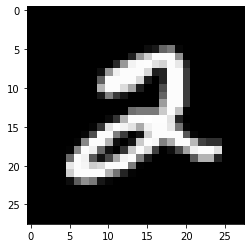

In [ ]:
# making certain predictions
image = x_train[5]
# Let's display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [ ]:
# to verify the prediction of the particular image
image = image.reshape(1,image.shape[0], image.shape[1],image.shape[2])
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

Predicted: 2


In [ ]:
model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3),
                 strides=2,
                 activation='relu',
                 input_shape=(img_shape)))
model.add(Dropout(0.5))
model.add(Conv2D(30, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
x = model.fit(x_train, y_train , epochs= 10 , batch_size = 128 , verbose = 2 , validation_split= 0.1)

Epoch 1/10
422/422 - 10s - loss: 0.5094 - accuracy: 0.8430 - val_loss: 0.1451 - val_accuracy: 0.9607 - 10s/epoch - 24ms/step
Epoch 2/10
422/422 - 9s - loss: 0.2145 - accuracy: 0.9341 - val_loss: 0.0891 - val_accuracy: 0.9763 - 9s/epoch - 22ms/step
Epoch 3/10
422/422 - 9s - loss: 0.1613 - accuracy: 0.9497 - val_loss: 0.0744 - val_accuracy: 0.9788 - 9s/epoch - 22ms/step
Epoch 4/10
422/422 - 9s - loss: 0.1327 - accuracy: 0.9594 - val_loss: 0.0607 - val_accuracy: 0.9832 - 9s/epoch - 22ms/step
Epoch 5/10
422/422 - 9s - loss: 0.1179 - accuracy: 0.9636 - val_loss: 0.0585 - val_accuracy: 0.9840 - 9s/epoch - 22ms/step
Epoch 6/10
422/422 - 9s - loss: 0.1051 - accuracy: 0.9663 - val_loss: 0.0556 - val_accuracy: 0.9837 - 9s/epoch - 22ms/step
Epoch 7/10
422/422 - 9s - loss: 0.0976 - accuracy: 0.9698 - val_loss: 0.0486 - val_accuracy: 0.9875 - 9s/epoch - 22ms/step
Epoch 8/10
422/422 - 9s - loss: 0.0868 - accuracy: 0.9726 - val_loss: 0.0490 - val_accuracy: 0.9872 - 9s/epoch - 22ms/step
Epoch 9/10
422